<a href="https://colab.research.google.com/github/srishti-git1110/Contrastive-PCA/blob/main/results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
from target_and_background_set import get_foreground_target_and_background_set

IMAGE_PATH = '/content/tiny-imagenet-200/train/n01443537/images' # Replace with your own path containing some background images
        
foreground, target, background = get_foreground_target_and_background_set(IMAGE_PATH)

# PCA on original set
pca = PCA(n_components=2)
fg_pca = pca.fit_transform(foreground.view(foreground.shape[0],-1))
colors = ['g','y']
plt.subplots()
for i, label in enumerate(np.sort(np.unique(target_labels))):
  plt.scatter(fg_pca[np.where(target_labels==label),0],fg_pca[np.where(target_labels==label),1], 
                color=colors[i], label=f'Label {label}')
plt.legend()

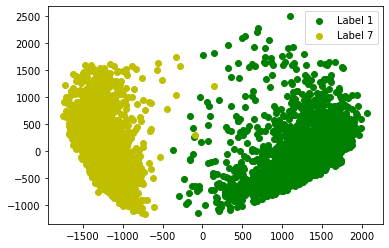

In [ ]:
# PCA on target set
pca = PCA(n_components=2)
fg = pca.fit_transform(np.array(target.reshape(target.shape[0], -1)))
plt.subplots()
for i, l in enumerate(np.sort(np.unique(target_labels))):
    plt.scatter(fg[np.where(target_labels==l),0],fg[np.where(target_labels==l),1], 
                color=colors[i], label='Digit ' +str(l))
plt.legend()

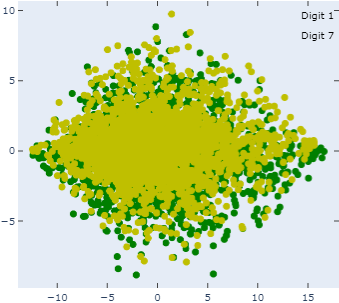

In [ ]:
# CPCA on target set

!pip install contrastive
from contrastive import CPCA

cpca = CPCA()
projected_data = cpca.fit_transform(np.array(target.reshape(target.shape[0], -1)), np.array(background.reshape(target.shape[0], -1)), gui=True, active_labels=target_labels)

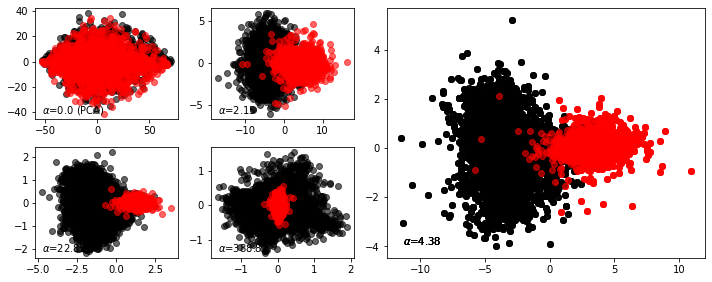